In [1]:
# 训练数据预处理
import numpy as np
from sklearn.utils import shuffle
import os
import matplotlib.pyplot as plt

In [2]:
# 评论语料目录
hotel_feedbacks_dir = "./hotel_feedbacks_sentiment"

In [4]:
# all_positive和all_negative含有所有的正样本和负样本
with open(hotel_feedbacks_dir + "/" + "neg.txt", "r", encoding="utf-8") as f:
    all_negative = [line.strip() for line in f.readlines()]
with open(hotel_feedbacks_dir + "/" + "pos.txt", "r", encoding="utf-8") as f:
    all_positive = [line.strip() for line in f.readlines()]

In [20]:
print(all_positive[2])

不错，下次还考虑入住。交通也方便，在餐厅吃的也不错。


In [5]:
# 获取所有文本的长度
all_length = [len(i) for i in all_negative] + [len(i) for i in all_positive]

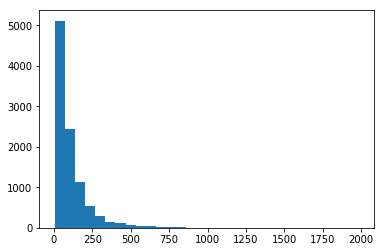

In [6]:
# 可视化语料序列长度, 可见大部分文本的长度都在300以下
plt.hist(all_length, bins=30)
plt.show()

In [30]:
np.mean(np.array(all_length) < 300)

0.9346

In [7]:
# 把所有的语料放到list里, 每一条语料是一个dict: {"text":文本, "label":分类}
all_data = []
for text in all_positive:
    all_data.append({"text": text, "label": 1})
for text in all_negative:
    all_data.append({"text": text, "label": 0})

In [10]:
# shuffle打乱顺序
all_data = shuffle(all_data, random_state=1)

In [11]:
# 拿出5%的数据用来测试
test_proportion = 0.05
test_idx = int(len(all_data) * test_proportion)

In [12]:
# 分割训练集和测试集
test_data = all_data[:test_idx]
train_data = all_data[test_idx:]

In [14]:
# 输出训练集和测试集为txt文件, 每一行为一个dict: {"text":文本, "label":分类}
with open("train_sentiment.txt", "a", encoding="utf-8") as f:
    for line in train_data:
        f.write(str(line))
        f.write("\n")
with open("test_sentiment.txt", "a", encoding="utf-8") as f:
    for line in test_data:
        f.write(str(line))
        f.write("\n")  